In [ ]:
import bpy

# 選択したオブジェクトの参照を取得
selected_objects = bpy.context.selected_objects
if selected_objects:
    # 出力ファイルのパスと名前
    output_file = "output_pineapple.txt"
    # ファイルを開いて書き込みモードで準備
    with open(output_file, "w") as file:
        for obj in selected_objects:
            if obj.type == "MESH":
                mesh = obj.data
                vertices = mesh.vertices
                vertex_colors = mesh.vertex_colors.active  # アクティブな頂点カラーレイヤー
                # 頂点情報をファイルに書き込む
                for vertex in vertices:
                    coord = obj.matrix_world @ vertex.co  # グローバル座標系での頂点座標
                    line = ' '.join(map(str, coord))
                    if vertex_colors:
                        color = vertex_colors.data[vertex.index].color
                        line += ' ' + ' '.join(map(str, color))
                    else:
                        line += ' NoColor'
                    file.write(line + "\n")
    print(f"頂点情報を {output_file} に出力しました。")
else:
    print("オブジェクトが選択されていません。")

(3075072, 3)
[[37.         36.          6.          0.47450981  0.47450981  0.16078432]
 [38.         36.          6.          0.47450981  0.47058824  0.15294118]
 [38.         36.          6.          0.47450981  0.47058824  0.15686275]
 ...
 [38.         36.          6.          0.49411765  0.48627451  0.15686275]
 [38.         36.          6.          0.47450981  0.47058824  0.15294118]
 [37.         36.          6.          0.47450981  0.47450981  0.16078432]]
(19578, 6)


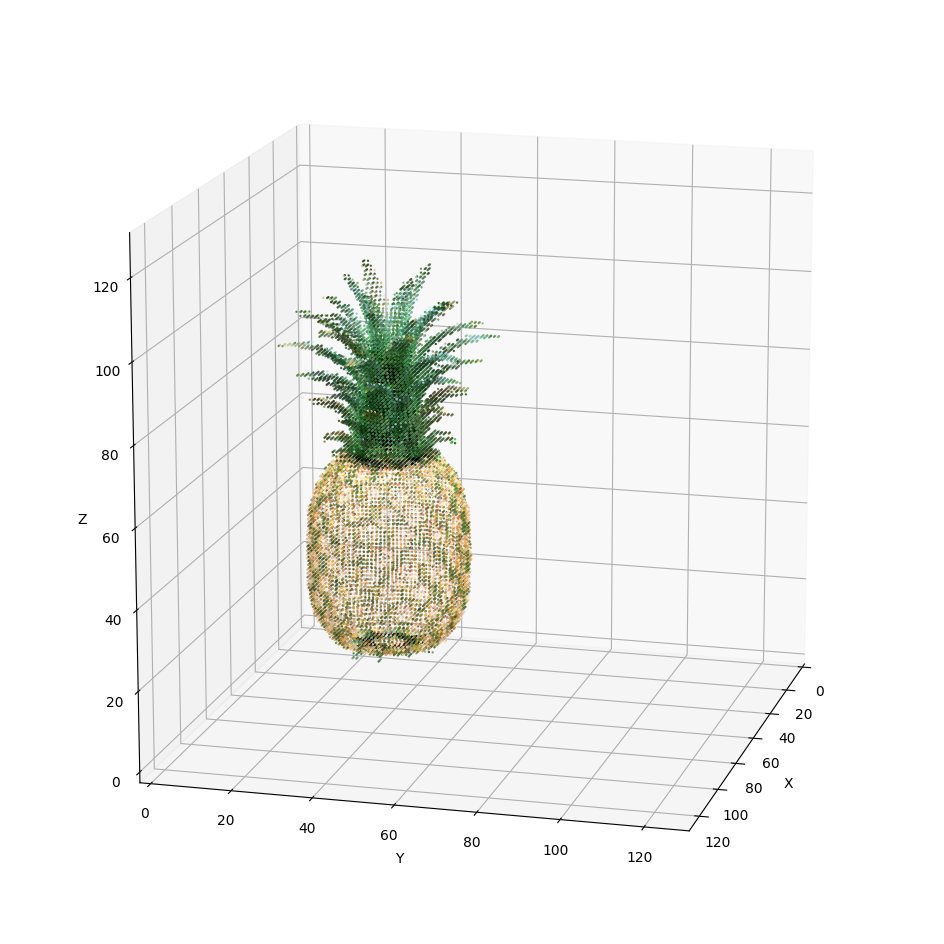

In [28]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#これ9*9*9になってるから直す（色確認してから）
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output_pineapple.txt')

virtex_all = np.round(b[:,0:3])
print(virtex_all.shape)
virtex_color_all = np.append(virtex_all, b[:,3:6], axis = 1)
print(virtex_color_all)

# numpy配列をpandas DataFrameに変換
df = pd.DataFrame(virtex_color_all)
# 1~3列目を基準にグループ化し、4~6列目について平均値を計算します
df_grouped = df.groupby(df.iloc[:,0:3].apply(tuple, axis=1)).first()
# pandas DataFrameをnumpy配列に再変換
virtex_color = df_grouped.values
# 結果を表示
print(virtex_color.shape)
colors_seikika = virtex_color[:,3:6]

# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex_color[:,0], virtex_color[:,1], virtex_color[:,2], s = 0.5, c = colors_seikika, alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

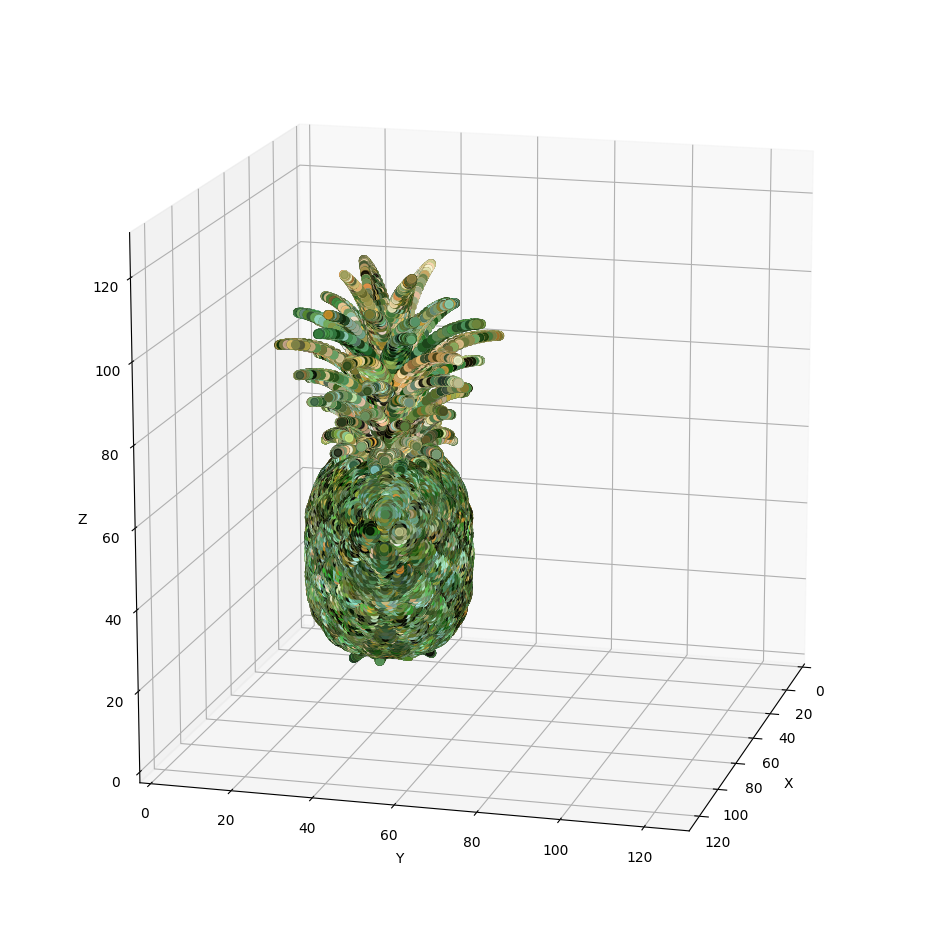

In [3]:
colors_seikika = b[:,3:6]

# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
ax.scatter(b[:,0], b[:,1], b[:,2], s = 0.5, c = colors_seikika, alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")
plt.show()